<a href="https://colab.research.google.com/github/izzaauliyairabby/RFM_Analysis/blob/main/E_CommerceDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Personal Data**

* Name : Izza Auliyai Rabby
* Dicoding ID : https://www.dicoding.com/users/izza_auliyai_rabby
* Title : RFM Analysis & Correlation Final Submission Project

### **Defining Business Question**

In this project, we will perform data analysis on an e-commerce dataset with the aim of answering two questions:

* What are purchasing patterns by product category in a geographic area?
* *How* does the relationship between product weight and shipping costs affect customer satisfaction scores?

**Import Necessary Packages**

In [35]:
# Import Necessary Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Wrangling**

Data wrangling, also known as data munging, is the process of cleaning, structuring, and transforming raw data into a desired format for better decision making in less time. It involves several tasks, including handling missing data, dealing with outliers, converting data types, merging datasets, and more. The goal of data wrangling is to make the data more suitable and valuable for analysis.

### **Data Gathering**

**Customers Dataset**

In [36]:
# Customer Dataset
customers_dataset = pd.read_csv('customers_dataset.csv')

# using head() function to show
customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Orders Dataset**

In [37]:
# Order Dataset
orders_dataset = pd.read_csv('orders_dataset.csv')

# using head() function to show
orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Order Items Dataset**

In [38]:
# Order Items Dataset
order_items_dataset = pd.read_csv('order_items_dataset.csv')

# Head() to show
order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Order Reviews Dataset**

In [39]:
# Order Reviews Datasets
order_reviews_dataset = pd.read_csv('order_reviews_dataset.csv')

# Using Head() Function to shows
order_reviews_dataset.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Products Dataset**

In [40]:
# Product Dataset
products_dataset = pd.read_csv('products_dataset.csv')

# Head() to show
products_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### **Assessing Data**

In [41]:
# Customer Dataset Assess
customers_dataset.info()
print(f"duplicated: {customers_dataset.duplicated().sum()}")

# Orders_dataset Assess
orders_dataset.info()
print(f"duplicated: {orders_dataset.duplicated().sum()}")

# Order Items Dataset Assess
order_items_dataset.info()
print(f"duplicated: {order_items_dataset.duplicated().sum()}")

# Order Reviews Dataset Assess
order_reviews_dataset.info()
print(f"duplicated: {order_reviews_dataset.duplicated().sum()}")

# Product Dataset Assess
products_dataset.info()
print(f"duplicated: {products_dataset.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
duplicated: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-n

### **Data Cleaning**

In [42]:
# Customer Dataset Cleaning
customer_df = customers_dataset[['customer_id', 'customer_city']]
customer_df.head()

,customer_id,customer_city
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas


In [43]:
# Order Dataset Cleaning
orders_df = orders_dataset[['order_id', 'customer_id', 'order_purchase_timestamp']]
orders_df.head()

,order_id,customer_id,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39


In [44]:
# Order Items Dataset Cleaning
order_items_df = order_items_dataset[['order_id', 'product_id', 'freight_value', 'price']]
order_items_df.head()

,order_id,product_id,freight_value,price
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,13.29,58.90
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,19.93,239.90
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,17.87,199.00
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.79,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,18.14,199.90


In [45]:
# Order Reviews Dataset Cleaning
order_reviews_df = order_reviews_dataset[['review_id', 'order_id', 'review_score']]
order_reviews_df.head()

,review_id,order_id,review_score
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5


In [46]:
# Product Dataset Cleaning
products_df = products_dataset[['product_id', 'product_category_name', 'product_weight_g']]
products_df.head()

,product_id,product_category_name,product_weight_g
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0


**Merging All Dataset**

In [47]:
# Dataframe for Merging All Datasets into one
df = pd.merge(customer_df, orders_df, on='customer_id')
df = pd.merge(df, order_items_df, on='order_id')
df = pd.merge(df, order_reviews_df, on='order_id')
df = pd.merge(df, products_df, on='product_id')
df.head()

,customer_id,customer_city,order_id,order_purchase_timestamp,product_id,freight_value,price,review_id,review_score,product_category_name,product_weight_g
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,a9516a079e37a9c9c36b9b78b10169e8,21.88,124.99,88b8b52d46df026a9d1ad2136a59b30b,4,moveis_escritorio,8683.0
1,8912fc0c3bbf1e2fbf35819e21706718,santarem,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,a9516a079e37a9c9c36b9b78b10169e8,24.90,112.99,7fc63200f12eebb5f387856afdd63db8,1,moveis_escritorio,8683.0
2,8912fc0c3bbf1e2fbf35819e21706718,santarem,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,a9516a079e37a9c9c36b9b78b10169e8,24.90,112.99,7fc63200f12eebb5f387856afdd63db8,1,moveis_escritorio,8683.0
3,f0ac8e5a239118859b1734e1087cbb1f,nova santa rita,b1a5d5365d330d10485e0203d54ab9e8,2017-05-07 20:11:26,a9516a079e37a9c9c36b9b78b10169e8,15.62,124.99,251191809e37c1cffc16865947c18a4d,3,moveis_escritorio,8683.0
4,6bc8d08963a135220ed6c6d098831f84,mage,2e604b3614664aa66867856dba7e61b7,2018-02-03 19:45:40,a9516a079e37a9c9c36b9b78b10169e8,30.59,106.99,f7123bac5b91a0e2e38d8b41fd1206f4,4,moveis_escritorio,8683.0


In [48]:
# Saving Merged Data
df.to_csv('main_data.csv', index=False)

## **Exploratory Data Analysis (EDA)**

Exploratory Data Analysis, is an approach to analyzing data sets to summarize their main characteristics, often with the help of statistical graphics and other data visualization methods. The primary goal of EDA is to uncover patterns, relationships, anomalies, and insights within the data. It is a critical step in the data analysis process as it helps analysts and data scientists understand the data, formulate hypotheses, and guide the selection of appropriate modeling techniques.

**Explore Data**

In [49]:
df.describe()

,freight_value,price,review_score,product_weight_g
count,112372.000000,112372.000000,112372.000000,112354.000000
mean,19.977752,120.378962,4.032473,2090.610882
std,15.781421,182.152386,1.387849,3748.608093
min,0.000000,0.850000,1.000000,0.000000
25%,13.070000,39.900000,4.000000,300.000000
50%,16.250000,74.900000,5.000000,700.000000
75%,21.150000,134.900000,5.000000,1800.000000
max,409.680000,6735.000000,5.000000,40425.000000


In [50]:
df.describe(include="all")

,customer_id,customer_city,order_id,order_purchase_timestamp,product_id,freight_value,price,review_id,review_score,product_category_name,product_weight_g
count,112372,112372,112372,112372,112372,112372.000000,112372.000000,112372,112372.000000,110774,112354.000000
unique,97917,4108,97917,97371,32789,NaN,NaN,97709,NaN,73,NaN
top,be1c4e52bb71e0c54b11a26b8e8d59f2,sao paulo,5a3b1c29a49756e75f1ef513383c0c12,2017-10-17 13:06:29,aca2eb7d00ea1a7b8ebd4e68314663af,NaN,NaN,e8236fe7b6e1bdd513a500de361e2b87,NaN,cama_mesa_banho,NaN
freq,22,17794,22,22,524,NaN,NaN,21,NaN,11137,NaN
mean,NaN,NaN,NaN,NaN,NaN,19.977752,120.378962,NaN,4.032473,NaN,2090.610882
std,NaN,NaN,NaN,NaN,NaN,15.781421,182.152386,NaN,1.387849,NaN,3748.608093
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.850000,NaN,1.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,13.070000,39.900000,NaN,4.000000,NaN,300.000000
50%,NaN,NaN,NaN,NaN,NaN,16.250000,74.900000,NaN,5.000000,NaN,700.000000
75%,NaN,NaN,NaN,NaN,NaN,21.150000,134.900000,NaN,5.000000,NaN,1800.000000


**Explore Product Weight and Review Score**

In [51]:
# Grouping based by Weight and Review Score
df.groupby(by='review_score').agg({ 'customer_id': 'nunique', 'product_weight_g': ["max", "min", "mean", "std"]}).reset_index()

review_score customer_id product_weight_g                                
                   nunique              max   min         mean          std
0            1       10854          40425.0  50.0  2309.738987  4180.766044
1            2        3086          30000.0  50.0  2286.535244  3985.155977
2            3        8107          30000.0   0.0  2193.618062  3906.888707
3            4       19065          30000.0   2.0  2124.589472  3722.454361
4            5       57006          40425.0   0.0  2002.869834  3610.617643

**Explore Freight Value and Review Score**

In [52]:
# Using Groupby for Grouping
df.groupby(by='review_score').agg({'customer_id': 'nunique','freight_value': ["max", "min", "mean", "std"]}).reset_index()

review_score customer_id freight_value                           
                   nunique           max  min       mean        std
0            1       10854        294.76  0.0  21.214145  17.919190
1            2        3086        321.88  0.0  20.943973  17.329938
2            3        8107        255.92  0.0  20.285945  15.089001
3            4       19065        375.28  0.0  20.053005  15.133306
4            5       57006        409.68  0.0  19.570804  15.463239

**Explore Order Rank in Each State**

In [53]:
df.groupby(by='customer_city').order_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15291
rio de janeiro     6749
belo horizonte     2731
brasilia           2106
curitiba           1501
                  ...  
rio doce              1
iaras                 1
ibarama               1
ibema                 1
lagoao                1
Name: order_id, Length: 4108, dtype: int64

Summary : Saulo Paulo Ranked 1

**Explore Product Category and Review Score**

In [54]:
df.groupby(by=['product_category_name']).agg({'product_id': 'nunique','review_score': 'mean'}).reset_index()

,product_category_name,product_id,review_score
0,agro_industria_e_comercio,74,4.000000
1,alimentos,82,4.218182
2,alimentos_bebidas,103,4.315412
3,artes,54,3.937198
4,artes_e_artesanato,19,4.125000
...,...,...,...
68,sinalizacao_e_seguranca,92,4.086294
69,tablets_impressao_imagem,8,4.123457
70,telefonia,1125,3.946867
71,telefonia_fixa,115,3.683206


**Data Visualization & Explanatory Of Analysis**

**Business Question : What are purchasing patterns by product category in a geographic area?**

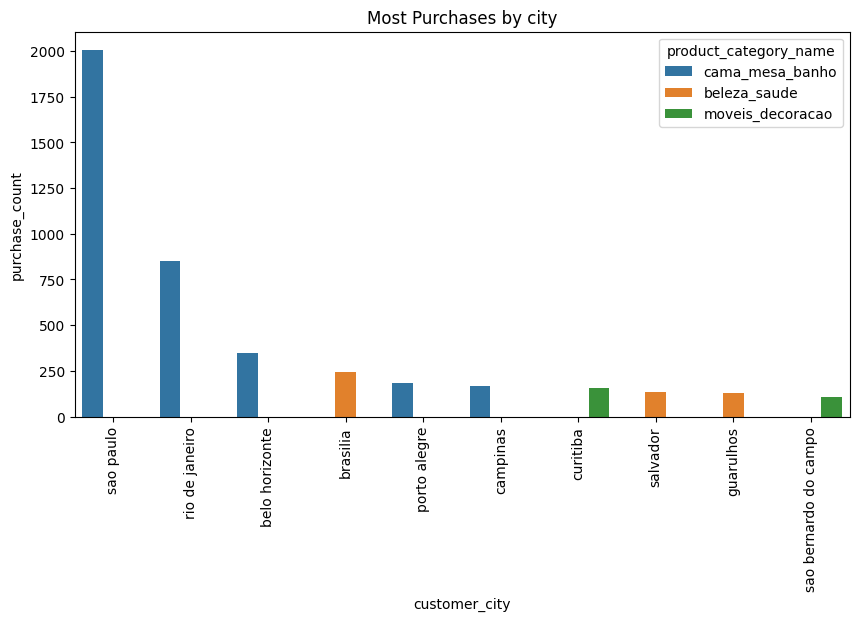

In [55]:
by_city = df.groupby(['customer_city', 'product_category_name']).size().reset_index(name='purchase_count')
top_category_per_city = by_city.sort_values(by=['customer_city', 'purchase_count'], ascending=[True, False]).groupby('customer_city').first().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='customer_city',y='purchase_count',hue='product_category_name',data=top_category_per_city.nlargest(10, 'purchase_count'))
plt.title('Most Purchases by city')
plt.xticks(rotation=90)
plt.show()

**Question 2 : How does the relationship between product weight and shipping costs affect customer satisfaction scores?**

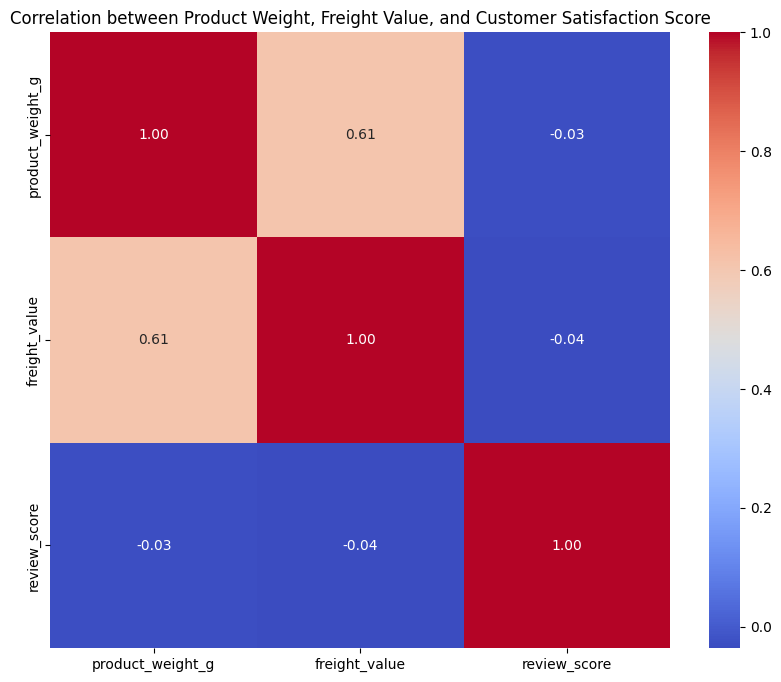

In [56]:
# Using Correlation Matrix Methodology
correlation_matrix = df[['product_weight_g', 'freight_value', 'review_score']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Product Weight, Freight Value, and Customer Satisfaction Score')
plt.show()

# RFM Analysis

RFM analysis is a marketing analytics technique used to segment and analyze customers based on their recentness, frequency, and monetary value of transactions. The acronym RFM stands for:

Recency (R): How recently a customer has made a purchase. It is often measured by the time since the last purchase.

Frequency (F): How often a customer makes a purchase. It is a count of the number of transactions over a specified period.

Monetary Value (M): The total monetary value of a customer's purchases. It represents the total amount of money spent by the customer.

RFM analysis is widely used in the fields of direct marketing and customer relationship management (CRM) to identify different customer segments based on their behavior. The analysis helps businesses tailor their marketing strategies to specific customer segments, improving customer engagement and loyalty.

In [57]:
customer_id_mapping = {customer_id: i +1 for i, customer_id in enumerate(df['customer_id'].unique())}
df['id'] = df['customer_id'].map(customer_id_mapping)

rfm_df = df.groupby(by='id', as_index=False).agg({"order_purchase_timestamp": "max", "order_id": "nunique", "price": "sum" })
rfm_df.columns = ['customer_id', 'max_order_timestamp', 'frequency', 'monetary']
rfm_df['max_order_timestamp'] = pd.to_datetime(rfm_df['max_order_timestamp'])
recent_date = pd.to_datetime(df['order_purchase_timestamp']).max()
rfm_df['recency'] = rfm_df['max_order_timestamp'].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.to_csv('rfm.csv', index=False)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,1,1,124.99,474
1,2,1,225.98,298
2,3,1,124.99,483
3,4,1,106.99,211
4,5,1,126.99,528


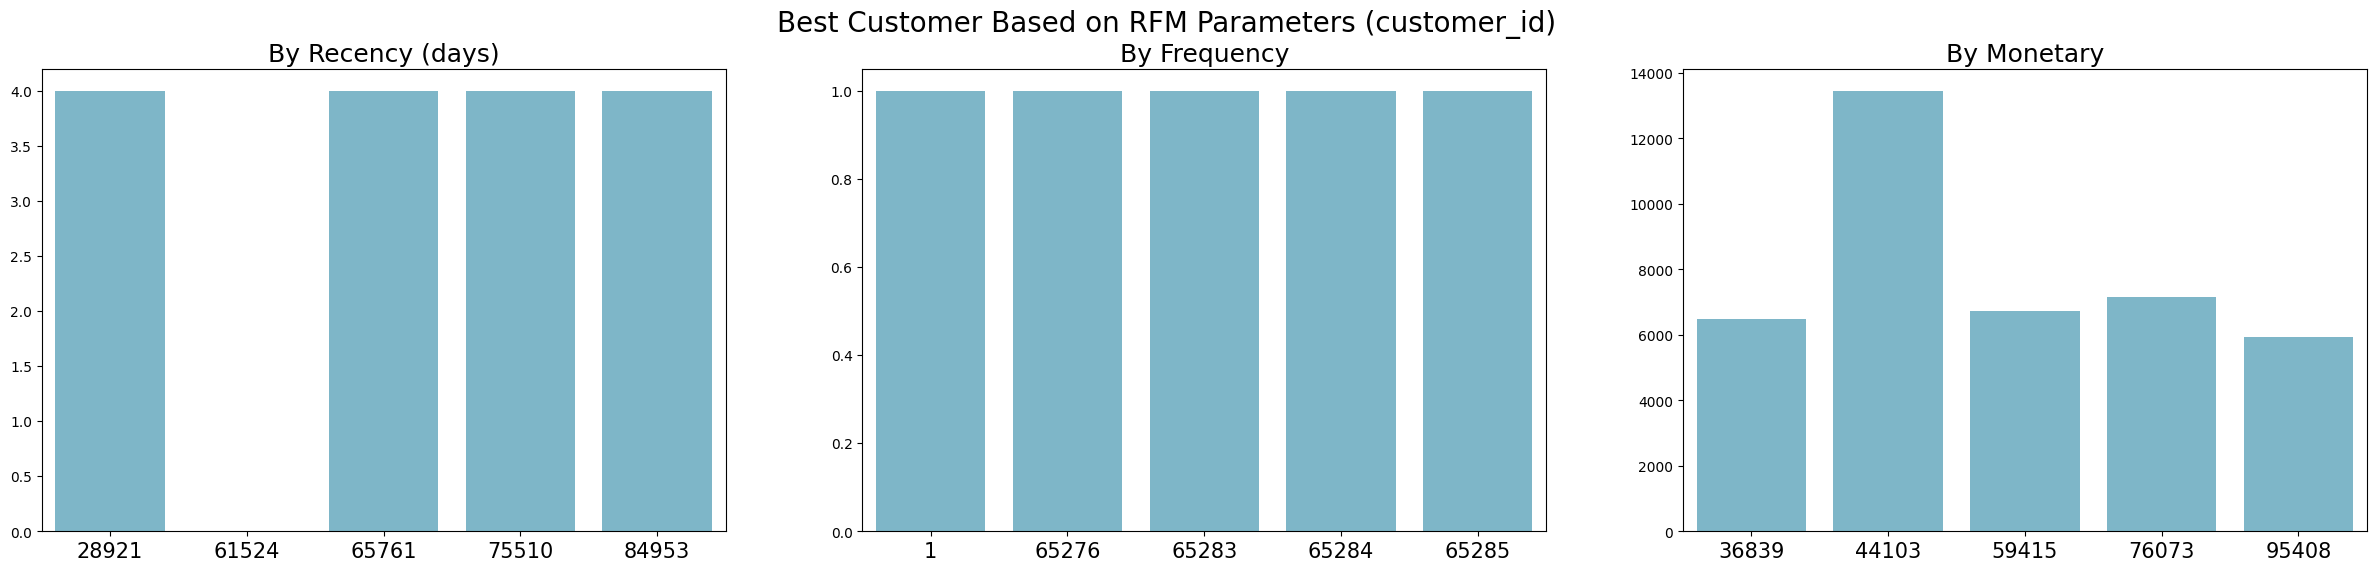

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(
    by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(
    by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(
    by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

# Conclusion

**Answer for Question 1 :**
* What are purchasing patterns by product category in a geographic area?
How does the relationship between product weight and shipping costs affect customer satisfaction scores?

Based on the results of data analysis, it can be concluded that purchasing patterns based on product categories in a geographic area show that products in the categories "cama_mesa_banho", "beleza_saude" and "moveis_designacao" have a significant number of purchases in various geographic areas. area. area. The most purchases occurred in the city of Sao Paulo, followed by Rio de Janeiro and Belo Horizonte.

**Answer for Question 2 :**

* How does the relationship between product weight and shipping costs affect customer satisfaction scores?

Based on the results of data analysis, it can be concluded that product weight does not have a significant influence on customer satisfaction ratings, with a correlation coefficient of -0.03. Likewise, the price of shipping costs does not have a big influence on customer satisfaction assessments, with a correlation coefficient of -0.04.